In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
us_edu = pd.read_csv("datasets_95317_1078789_states_all.csv")

In [3]:
r_e=us_edu[["STATE","YEAR","TOTAL_REVENUE","TOTAL_EXPENDITURE"]]

In [4]:
r_e.drop(r_e[r_e["STATE"]=="NATIONAL"].index, axis=0, inplace=True)

In [5]:
r_e.drop(r_e[r_e["STATE"]=="DODEA"].index, axis=0, inplace=True)

In [6]:
states=us_edu["STATE"].unique()

In [7]:
for state in states:
    r_e[r_e["STATE"]==state]["TOTAL_REVENUE"].fillna(r_e[r_e["STATE"]==state]["TOTAL_REVENUE"].mean())

In [8]:
for state in states:
    r_e[r_e["STATE"]==state]["TOTAL_EXPENDITURE"].fillna(r_e[r_e["STATE"]==state]["TOTAL_EXPENDITURE"].mean())

In [9]:
# 1st Part
# Applying one of the statistical approach Z Score we observe outliers.

In [10]:
from scipy.stats import zscore

z_scores = zscore(r_e["TOTAL_REVENUE"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 182
------
Threshold value: 2
Number of Outliers: 76
------
Threshold value: 3
Number of Outliers: 47
------
Threshold value: 4
Number of Outliers: 32
------


In [11]:
from scipy.stats import zscore

z_scores = zscore(r_e["TOTAL_EXPENDITURE"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 182
------
Threshold value: 2
Number of Outliers: 78
------
Threshold value: 3
Number of Outliers: 47
------
Threshold value: 4
Number of Outliers: 24
------


In [12]:
# 2nd Part
# Applying Winsorizing Method we eliminate the outliers
# We observe the difference by box plot

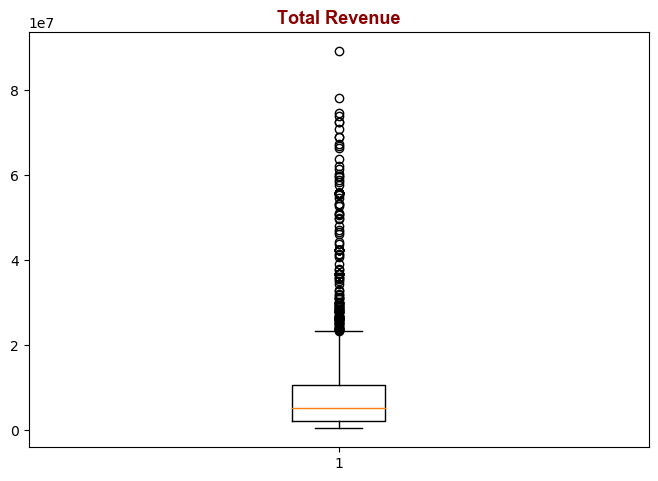

In [13]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.boxplot(r_e["TOTAL_REVENUE"].dropna())
plt.title("Total Revenue", fontdict=title_font)
plt.show()

In [14]:
from scipy.stats.mstats import winsorize

winsorizing= winsorize(np.array(r_e.TOTAL_REVENUE.dropna()), (0.10, 0.10))
winsorizing

masked_array(data=[2678885.  , 1243227.  , 3258079.  , ..., 2664419.  ,
                   8944846.84, 1243227.  ],
             mask=False,
       fill_value=1e+20)

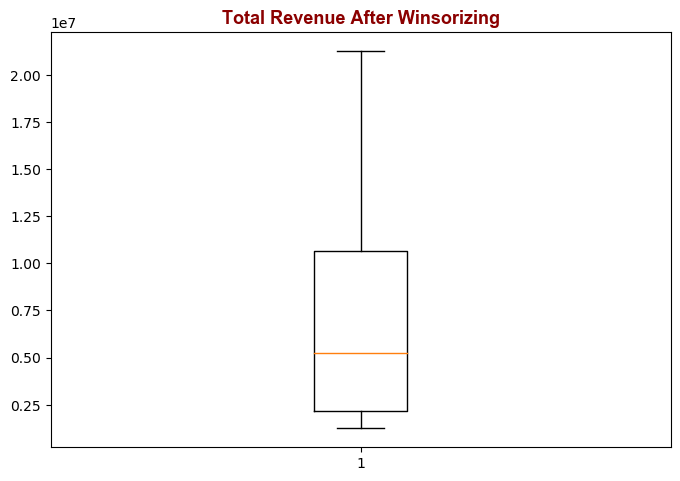

In [15]:
plt.boxplot(winsorizing)
plt.title("Total Revenue After Winsorizing", fontdict=title_font)
plt.show()

In [16]:
from scipy.stats.mstats import winsorize

winsorizing= winsorize(np.array(r_e.TOTAL_EXPENDITURE.dropna()), (0.10, 0.10))
winsorizing

masked_array(data=[2653798.  , 1265367.  , 3401580.  , ..., 2670432.28,
                   8995488.76, 1265367.  ],
             mask=False,
       fill_value=1e+20)

In [18]:
# 3rd Part
# we subtract the total expenditure TOTAL_EXPENDITURE from the total income variable
# TOTAL_REVENUE. So we will have a variable that can be considered as a budget deficit 

In [19]:
r_e["BUDGET_DEFICIT"]=r_e["TOTAL_REVENUE"]-r_e["TOTAL_EXPENDITURE"]

In [20]:
from scipy.stats import zscore

z_scores = zscore(r_e["BUDGET_DEFICIT"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 76
------
Threshold value: 2
Number of Outliers: 22
------
Threshold value: 3
Number of Outliers: 7
------
Threshold value: 4
Number of Outliers: 3
------


In [32]:
from scipy.stats.mstats import winsorize

winsorizing_bd= winsorize(np.array(r_e.BUDGET_DEFICIT.dropna()), (0.10, 0.10))
winsorizing_old_bd=pd.Series(winsorizing_bd)

In [33]:
# 4th Part
# this time, after clearing the outliers we acquire budget deficit again

In [34]:
from scipy.stats.mstats import winsorize

winsorizing_r= winsorize(np.array(r_e.TOTAL_REVENUE.dropna()), (0.10, 0.10))
winsorizing_e= winsorize(np.array(r_e.TOTAL_EXPENDITURE.dropna()), (0.10, 0.10))

In [35]:
winsorizing_new_bd=pd.Series(winsorizing_r-winsorizing_e)

In [36]:
type(winsorizing_new_bd)

pandas.core.series.Series

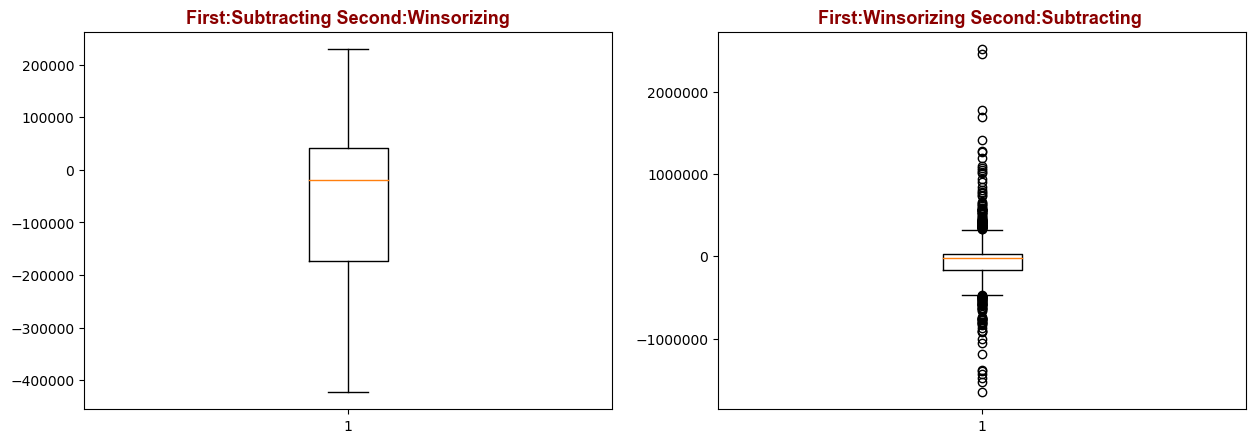

In [38]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorizing_old_bd.dropna())
plt.title("First:Subtracting Second:Winsorizing", fontdict=title_font)

plt.subplot(1,2,2)
plt.boxplot(winsorizing_new_bd.dropna())
plt.title("First:Winsorizing Second:Subtracting ", fontdict=title_font)
plt.show()

In [ ]:
# 5th Part
# we have two different budget variables, one of these after clearing the outliers we acquire budget deficit
# the other after subtracting we clear outliers and acquire budget deficit again
# the difference is even though we clean outliers when we subtract the values we obtain new values and they have 
# again outliers regardless of cleaning

In [ ]:
# 6th Part
# when comparing methods it is obvious that first subtracting at last clearing data gives us
# better results